In [53]:
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_opts = {'sep': '|',
           'quotechar': '"',
           'compression': 'gzip',
           'encoding': 'utf-8'}

In [3]:
with open('../hand/arrest_dtypes.yaml', 'r') as yamlfile:
        arrest_dtypes = yaml.load(yamlfile)

In [4]:
arrests = pd.read_csv('../input/arrests.csv.gz', **csv_opts, dtype=arrest_dtypes)

In [5]:
arrests['apprehension_date'] = pd.to_datetime(arrests['apprehension_date'], format='%m/%d/%Y')

In [6]:
redacted = ['birth_date']
arrests = arrests.drop(redacted, axis=1)

In [7]:
arrests['id'] = range(len(arrests))

In [8]:
arrests = arrests.rename({'area_of_responsibility': 'aor'}, axis=1)

In [9]:
arrests.aor = arrests.aor.str.replace('Area of Responsibility', '')
arrests.aor = arrests.aor.astype('category')

In [10]:
with open('../hand/aor_codes.yaml', 'r') as yamlfile:
        aor_codes = yaml.load(yamlfile)

In [11]:
arrests['aor'] = arrests['aor'].str.strip().replace(aor_codes)

In [12]:
arrests.head()

,aor,apprehension_date,apprehension_method,apprehension_landmark,operation,processing_disposition,citizenship,gender,id
0,SPM,2015-10-01,Probation and Parole,OMAHA NE NON-FUGITIVE ARREST,NaN,REINSTATEMENT OF DEPORT ORDER I-871,MEXICO,Male,0
1,CHI,2015-10-01,Non-Custodial Arrest,"CHI GENERAL AREA, NON-SPECIFIC",NaN,Bag and Baggage,GUATEMALA,Male,1
2,LOS,2015-10-01,CAP State Incarceration,CALIFORNIA MENS COLONY WEST,NaN,Other,LAOS,Male,2
3,HOU,2015-10-01,CAP State Incarceration,"TEXAS DEPT OF CRIMINAL JUSTICE, WALKER CO",NaN,REINSTATEMENT OF DEPORT ORDER I-871,MEXICO,Male,3
4,SNA,2015-10-01,CAP Federal Incarceration,HOUSTON ERO CONTRACT DET FACILITY,NaN,Other,MEXICO,Male,4


In [40]:
simplified_methods = {'Other efforts': 'Other',
'Law Enforcement Agency Response Unit': 'Other',
'Patrol Border': 'Other',
'Other Agency (turned over to INS)': 'Other',
'Inspections': 'Other',
'Other Task Force': 'Other',
'Worksite Enforcement': 'Other',
'Organized Crime Drug Enforcement Task Force': 'Other',
'Anti-Smuggling': 'Other',
'Patrol Interior': 'Other',
'Traffic Check': 'Other',
'Boat Patrol': 'Other',
'Crewman/Stowaway': 'Other',
'Transportation Check Aircraft': 'Other',
'Criminal Alien Program': 'Other',
'Transportation Check Freight Train': 'Other',
'Transportation Check Bus': 'Other',
'Transportation Check Passenger Train': 'Other'}

In [41]:
arrests['method'] = arrests['apprehension_method'].str.strip().replace(simplified_methods)

In [50]:
g = arrests.set_index('apprehension_date').groupby(['aor', 'method'])

In [79]:
data = g['id'].count().unstack()

In [80]:
# data['Total Arrests'] = data.sum(axis=1)

In [84]:
data_norm = data.div(data.sum(axis=1), axis=0) * 100

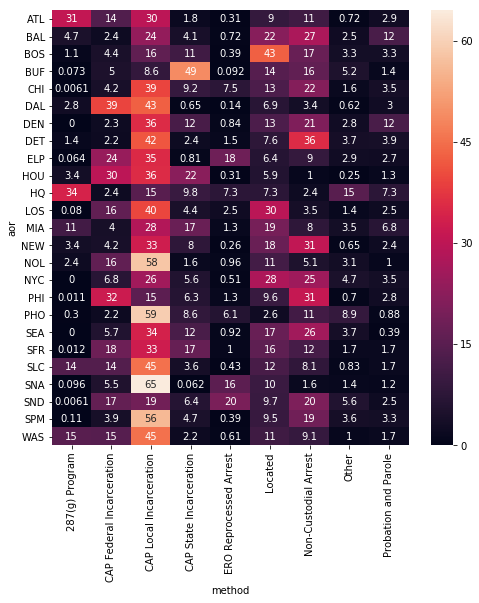

In [93]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(data_norm.fillna(0), ax=ax, square=False, annot=True)

In [95]:
arrests['processing_disposition'].str.upper().value_counts(dropna=False)

WARRANT OF ARREST/NOTICE TO APPEAR              225787
REINSTATEMENT OF DEPORT ORDER I-871             111084
OTHER                                            99196
BAG AND BAGGAGE                                  44505
ADMINISTRATIVE DEPORTATION I-851/I-851A          17664
VOLUNTARY RETURN                                  9703
EXPEDITED REMOVAL (I-860)                         8940
DETAINER                                          6256
NOTICE TO APPEAR RELEASED (I-862)                 3776
REINSTATEMENT OF DEPORTATION REASONABLE FEAR      3112
PROSECUTORIAL DISCRETION                          3023
EXPEDITED REMOVAL WITH CREDIBLE FEAR              1631
TURNED OVER TO                                    1480
NOTICE TO APPEAR DETAINED (I-862)                 1479
VWPP REMOVAL                                      1418
NOT AMENABLE TO REMOVAL                           1142
NOTICE TO APPEAR (I-862)                           960
PAROLED                                            881
VWP REMOVA

In [97]:
sea = arrests[arrests['aor'] == 'SEA']

In [98]:
sea['processing_disposition'].value_counts()

Warrant of Arrest/Notice to Appear              5549
REINSTATEMENT OF DEPORT ORDER I-871             2497
Other                                           1719
Bag and Baggage                                  861
ADMINISTRATIVE DEPORTATION I-851/I-851A          389
Reinstatement of Deportation Reasonable Fear     120
TURNED OVER TO                                    63
Detainer                                          53
Prosecutorial Discretion                          49
Expedited Removal (I-860)                         33
Not in Custody                                    27
Notice to Appear Released (I-862)                 23
VWPP Removal                                      19
Voluntary Return                                  18
Notice to Appear (I-862)                          15
Notice to Appear Detained (I-862)                 11
VWP Removal                                        9
Not Amenable to Removal                            5
Paroled                                       